# Assignment 0: Intro to CS 363D

Your UTCS accounts come with `python` installed but you can’t add packages to it (without root). Especially installing `scipy` and `numpy` on your own can be painful. We recommend using a local install of python, so that you can add any packages you need easily. We will use the python 3 version of [Anaconda](https://docs.continuum.io/), an open-source package and environment manager optimized for data science applications. It’s maintained by Austin-based Continuum Analytics.

## Part 1: Setting up your Jupyter Notebook

### Installing Anaconda on personal computers

* Make sure you have 2.5 GB free space available before you start installing. Use `baobab` to clear unused files and Chrome’s `.config` litter.
* Download the Anaconda - Python 3.6 zip archive from the [official website](https://www.anaconda.com/download/#download). This file is `~500 MB`, and the uncompressed version will be `~2 GB`.

~~~~
$ wget https://repo.continuum.io/archive/Anaconda3-4.4.0-Linux-x86_64.sh
# current as of this assignment
$ bash Anaconda3-4.4.0-Linux-x86_x64.sh
~~~~

* Accept the license agreement and select an installation directory. (Note that the install location defaults to `~/anaconda3`)
* It will take a few minutes to install. Please be patient.
* It will ask you whether to add it to your bash path (your `~/.bashrc` file). Note that the default is “no”. We recommend saying **yes**.
* Start a **new terminal**. Let’s make sure we’re using Anaconda’s Python we just installed.

~~~~
$ which python
/u/pkar/anaconda3/bin/python
# Note:- your username will appear in the path. Mine is 'pkar'.
~~~~

* Let’s start a notebook server.

~~~~
$ jupyter notebook
~~~~

* It should open a browser tab and start a local server.

<img src="imgs/screen1.png">

* Create a directory for this course (I called mine CS363), and make a new Python 3 notebook.
* Have a go at using the notebook interface. We’ll see more of what we can do with Jupyter notebooks in Part 2.

### Installing Jupyter notebooks on lab computers

The Anaconda install is too large for your allocated space in the computer lab. But you can still install Jupyter in the lab without installing Anaconda.

First log into your favorite cs linux machine. Almost all required packages are already installed on those machines.

~~~~
pip3 install --user jupyter
~~~~

Let’s fire up jupyter:

~~~~
ipython3 notebook --no-browser
~~~~

If you’re logged in locally open a browser at the url printed out. Otherwise port forward

~~~~
ssh -NL PORT:localhost:PORT SERVER
~~~~

You can figure out the `PORT` from the url provided by ipython. `SERVER` is the url of the machine you started ipython on.

Pro tip: If you want ipython to survive your SSH login, start it in a screen session.

*Note: This guide is inspired from Prof. Philip Krähenbühl's Neural Network course ([CS 342](http://www.philkr.net/cs342/homework/01/install.html)).*

### Additional Links

* [Stanford CS 231N iPython Tutorial](http://cs231n.github.io/ipython-tutorial/)
* [Jupyter Notebook Beginner Guide](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/)
* [Datacamp Jupyter Notebook Tutorial](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook#gs.PV0TCww)

You may have unforeseen difficulties with this portion of the assignment (not enough disk space, issues with permissions or package versions, conflicts with your personal `.bashrc` or `.zshrc` etc). 
**Please start early** and work with the TA (during office hours) or other classmates to resolve these.

## Part 2: A Simple Data Science Task

For this task we'll be using the 1994 Adult Census Income data (`adult.csv`) collected by Ronny Kohavi and Barry Becker. This is a reasonably clean dataset with both categorical and integer attributes. The dataset consists of `32.5K` rows with 14 attributes.

#### Attributes

You can find a detailed description of the dataset [here](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names).

| Attribute Name 		| Type 				|
| --------------------- | ----------------- |
| age					| continuous		|
| workclass				| categorical		|
| fnlwgt				| continuous		|
| education 			| categorical		|
| education-num			| categorical		|
| marital-status		| categorical		|
| occupation			| categorical		|
| relationship			| categorical		|
| race					| categorical		|
| sex					| categorical		|
| capital-gain			| continuous		|
| capital-loss			| continuous		|
| hours-per-week		| continuous		|
| native-country		| categorical		|

In [1]:
# Standard Headers
# You are welcome to add additional headers if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.__version__

'0.20.1'

In [2]:
# Enable inline mode for matplotlib so that IPython displays graphs.
%matplotlib inline

You can find more on reading (Comma Separated Value) CSV data as a Pandas dataframe [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

In [84]:
# add skipinitialspace=True to skip spaces after delimiter (will be required later for the map function)
adult_data = pd.read_csv("adult.csv", skipinitialspace=True)
# show the head of the data (first 5 values)
adult_data.head(30)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,High-school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,High-school,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
# display data types of various columns in a dataframe
adult_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

Q1.
1. Group the `adult_data` using the `marital-status` column. You may want to look at the `groupby()` method for dataframes [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html).
2. Display the mean, median and standard deviation statistics of `hours-per-week` column for each `marital-status` column.
3. Which marital status category has the maximum average work hours per week? which has the minimum?
4. Which marital status category has the most variability in work hours per week? which has the least?

In [26]:
# your code here
grouped = adult_data.groupby('marital-status',as_index=False)
grouped.mean()

,marital-status,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,Divorced,43.041639,185802.790457,10.030385,728.414810,64.600720,41.246680
1,Married-AF-spouse,32.478261,188165.565217,10.173913,432.652174,0.000000,41.130435
2,Married-civ-spouse,43.247596,186763.172877,10.320646,1764.859509,122.439103,43.284856
3,Married-spouse-absent,40.578947,193141.760766,9.308612,653.983254,57.779904,39.669856
4,Never-married,28.150988,195383.308996,9.962464,376.588318,52.345502,36.939998
5,Separated,39.354146,206444.325854,9.293659,535.568780,58.110244,39.301463
6,Widowed,58.975831,174159.042296,9.093656,571.071501,79.666667,32.979859


In [12]:
grouped['hours-per-week'].agg([np.mean, np.median, np.std])

,mean,median,std
marital-status,,,
Divorced,41.246680,40,10.676632
Married-AF-spouse,41.130435,40,19.440596
Married-civ-spouse,43.284856,40,11.905047
Married-spouse-absent,39.669856,40,11.767374
Never-married,36.939998,40,12.432542
Separated,39.301463,40,10.377534
Widowed,32.979859,40,14.058690


In [23]:
(grouped['hours-per-week'].mean()).max()
(grouped['hours-per-week'].mean()).min()

32.979859013091641

In [25]:
grouped['hours-per-week'].var().max()
grouped['hours-per-week'].var().min()

107.69321074695128

Q2. Show the distribution of the dataset with respect to the `education` column. Which plot is most suitable for this? Use matplotlib (or a library of your choice) to plot the distribution.

In [32]:
adult_data['education'].head()


0      Bachelors
1      Bachelors
2        HS-grad
3    High-school
4      Bachelors
Name: education, dtype: object

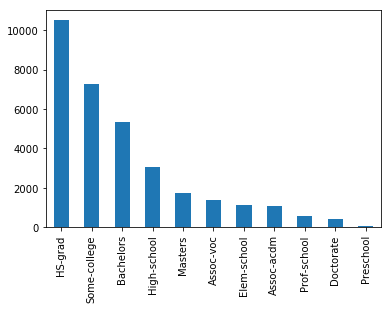

In [71]:
adult_data['education'].value_counts().plot(kind='bar')

In [36]:
# Please don't change this cell!!
continent_dict = {
    'Cambodia' : 'Asia',
    'Canada' : 'North-America',
    'China' : 'Asia',
    'Columbia' : 'South-America',
    'Cuba' : 'North-America',
    'Dominican-Republic' : 'North-America',
    'Ecuador' : 'South-America',
    'El-Salvador' : 'North-America',
    'England' : 'Europe',
    'France' : 'Europe',
    'Germany' : 'Europe',
    'Greece' : 'Europe',
    'Guatemala' : 'North-America',
    'Haiti' : 'North-America',
    'Holand-Netherlands' : 'Europe',
    'Honduras' : 'North-America',
    'Hong' : 'Asia',
    'Hungary' : 'Europe',
    'India' : 'Asia',
    'Iran' : 'Asia',
    'Ireland' : 'Europe',
    'Italy' : 'Europe',
    'Jamaica' : 'North-America',
    'Japan' : 'Asia',
    'Laos' : 'Asia',
    'Mexico' : 'North-America',
    'Nicaragua' : 'North-America',
    'Outlying-US(Guam-USVI-etc)' : 'North-America',
    'Peru' : 'South-America',
    'Philippines' : 'Asia',
    'Poland' : 'Europe',
    'Portugal' : 'Europe',
    'Puerto-Rico' : 'North-America',
    'Scotland' : 'Europe',
    'South' : 'Other',
    'Taiwan' : 'Asia',
    'Thailand' : 'Asia',
    'Trinadad&Tobago' : 'South-America',
    'United-States' : 'North-America',
    'Vietnam' : 'Asia',
    'Yugoslavia' : 'Europe',
    '?' : 'Other'
}

Q3. Using the dictionary provided above, create a new column called `continent` using the existing `native-country` column in the dataframe. You may want to look at the `map()` method for dataframes.

In [58]:
# You may want to create a deep copy of the initial dataframe object
# so that you can run this cell multiple times without errors.
adult_data_copy = adult_data.copy()
# your code goes here
continent = adult_data_copy['native-country'].map(continent_dict)
new = pd.DataFrame({'continent':continent,'native-country':adult_data_copy['native-country']})
new.head(15)

,continent,native-country
0,North-America,United-States
1,North-America,United-States
2,North-America,United-States
3,North-America,United-States
4,North-America,Cuba
5,North-America,United-States
6,North-America,Jamaica
7,North-America,United-States
8,North-America,United-States
9,North-America,United-States


Q4. Plot a bar graph showing the average age of working adults from each continent, and show the standard deviation on the same graph.

An example bar plot.
<img src="imgs/screen3.png">

In [67]:
new1 = pd.DataFrame({'continent':continent,'age':adult_data_copy['age']})
new1.head(15)

,age,continent
0,39,North-America
1,50,North-America
2,38,North-America
3,53,North-America
4,28,North-America
5,37,North-America
6,49,North-America
7,52,North-America
8,31,North-America
9,42,North-America


In [82]:
# your code goes here
q4 = new1.groupby('continent')
q4.std()
q4.mean()

,age
continent,
Asia,38.043219
Europe,41.600768
North-America,38.540090
Other,38.728507
South-America,38.299270


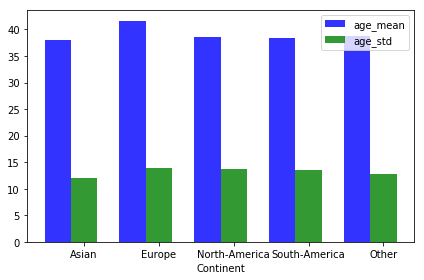

In [126]:
# data to plot
age_std=(11.963112,13.878938,13.686381,13.430850,12.692335)
age_mean=(38.04321,41.600768,38.540090,38.299270,38.728507)

# create plot
fig, ax = plt.subplots()
index = np.arange(5)
 
rects1 = plt.bar(index,age_mean,bar_width,alpha=opacity,color='b',label='age_mean')
 
rects2 = plt.bar(index + bar_width,age_std,bar_width,alpha=opacity,color='g',label='age_std')
 
plt.xlabel('Continent')
#plt.ylabel('Scores')
#plt.title('Scores by person')
plt.xticks(index + bar_width, ('Asian', 'Europe', 'North-America', 'South-America','Other'))
plt.legend()
plt.tight_layout()
plt.show()

Q5. To reduce the dimensionality of this dataset, which attribute or attributes would you eliminate? Explain why.

In [10]:
'''Explain why here (as a comment):
Capital loss and capital gain. Because most values of the two variables are 0 - it does not make sense with
analyzing bunch of null data.

'''

'Explain why here (as a comment):\n\n\n'

## Part 3: Handling Missing Values

For this task we'll be using a subset of the leaf dataset created by professors from University of Porto, Portugal. This dataset consists in a collection of shape and texture features extracted from digital images of leaf specimens originating from a total of 40 different plant species, but for the purpose of this assignment we're only going to consider 4 plant species.

You can find more information about the dataset [here](http://archive.ics.uci.edu/ml/datasets/Leaf).

<img src="imgs/screen4.png">

In [85]:
leaf_data = pd.read_csv("leaf.csv")
leaf_data.head(15)

,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,1,NaN,1.0118,0.63010,0.57134,0.81053,0.161870,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000
1,4,0.99512,10.3770,0.90564,0.92135,0.99825,0.179410,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514
2,3,0.19287,1.0551,0.25044,0.93641,0.99474,0.472840,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110
3,1,0.52212,1.1191,0.70988,0.50678,0.64912,0.141200,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809
4,3,0.33254,1.1208,0.27473,0.93625,0.99474,0.498360,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660
5,2,0.58232,1.3430,0.29271,0.95055,0.99825,0.714990,0.026876,0.131460,0.068134,0.132040,0.017136,0.003680,0.001470,1.63150
6,1,0.54893,1.1111,0.63983,0.56623,0.60000,0.157430,0.130810,3.114300,0.021231,0.079722,0.006315,0.001912,0.000074,0.71949
7,1,0.52382,1.1117,0.67175,0.54701,0.62982,0.151570,0.136740,3.402800,0.026434,0.085792,0.007306,0.002137,0.000166,0.90513
8,4,0.99571,10.3520,0.90609,0.90652,0.97895,0.167320,0.025787,0.121030,0.023523,0.089455,0.007939,0.002888,0.000069,0.73774
9,1,0.39092,1.0870,0.68174,0.50961,0.66140,0.153610,0.140820,3.609300,0.028638,0.089135,0.007882,0.002118,0.000210,0.90082


Q6. Eccentricity of the leaf is a measure of how much the shape of the leaf varies from a perfect circle. Unfortunately the dataset is missing values in the `eccentricity` column. Fill in these missing values with something reasonable.

In [86]:
# your code goes here
#we use the mean of the eccentricity of each class to fill in the missing blanks.
eccen = leaf_data.groupby('class')
eccen.mean()

,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
class,,,,,,,,,,,,,,
1,0.415627,1.087387,0.661612,0.529682,0.652521,0.158526,0.128979,3.046850,0.025704,0.086440,0.007714,0.002377,0.000144,0.808387
2,0.523489,1.321338,0.266052,0.970007,0.996493,0.769605,0.015911,0.049484,0.033550,0.090597,0.008799,0.002136,0.000564,0.918492
3,0.419514,1.165050,0.258229,0.940906,0.991521,0.521627,0.019451,0.071148,0.080622,0.151561,0.023398,0.005869,0.000939,1.728429
4,0.996231,12.253391,0.916300,0.904014,0.961881,0.151748,0.029311,0.201825,0.017079,0.071353,0.005208,0.001701,0.000070,0.586052


In [97]:
#Or we use the mean of all eccentricity score to replace the NaN.
leaf_data[['eccentricity']].mean()

eccentricity    0.567526
dtype: float64

In [175]:
values = {'eccentricity': 0.567526}
leaf_gooddata=leaf_data.fillna(value=values)
leaf_gooddata.head(30)

,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,1,0.567526,1.0118,0.63010,0.57134,0.81053,0.161870,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000
1,4,0.995120,10.3770,0.90564,0.92135,0.99825,0.179410,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514
2,3,0.192870,1.0551,0.25044,0.93641,0.99474,0.472840,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110
3,1,0.522120,1.1191,0.70988,0.50678,0.64912,0.141200,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809
4,3,0.332540,1.1208,0.27473,0.93625,0.99474,0.498360,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660
5,2,0.582320,1.3430,0.29271,0.95055,0.99825,0.714990,0.026876,0.131460,0.068134,0.132040,0.017136,0.003680,0.001470,1.63150
6,1,0.548930,1.1111,0.63983,0.56623,0.60000,0.157430,0.130810,3.114300,0.021231,0.079722,0.006315,0.001912,0.000074,0.71949
7,1,0.523820,1.1117,0.67175,0.54701,0.62982,0.151570,0.136740,3.402800,0.026434,0.085792,0.007306,0.002137,0.000166,0.90513
8,4,0.995710,10.3520,0.90609,0.90652,0.97895,0.167320,0.025787,0.121030,0.023523,0.089455,0.007939,0.002888,0.000069,0.73774
9,1,0.390920,1.0870,0.68174,0.50961,0.66140,0.153610,0.140820,3.609300,0.028638,0.089135,0.007882,0.002118,0.000210,0.90082


Q7. Normalize the `eccentricity` column. Where `value_norm = (value - mean(value)) / std(value)`. Display the head of the new data frame.

In [221]:
# your code goes here
df = leaf_gooddata[['eccentricity']]
norm_df = (df-df.mean())/df.std()
norm_df.head(15)

,eccentricity
0,1.586193e-07
1,1.763441e+00
2,-1.545119e+00
3,-1.872588e-01
4,-9.691060e-01
5,6.101212e-02
6,-7.669164e-02
7,-1.802478e-01
8,1.765875e+00
9,-7.283409e-01


Q8. Plot a scatter plot between `smoothness` and normalized `eccentricity`. Place `smoothness` on the X axis.

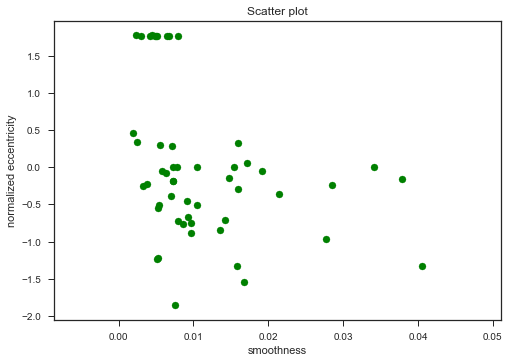

In [217]:
# your code goes here
x = leaf_data[['smoothness']]
y = normalized_df[['eccentricity']]

# Plot
plt.scatter(x, y,color='g')
plt.title('Scatter plot')
plt.xlabel('smoothness')
plt.ylabel('normalized eccentricity')
plt.show()

Q9. Now plot the same scatter plot as Q7 but give a different color to each `class` label. What can you infer from this plot (provide a short answer in the form of comments)?

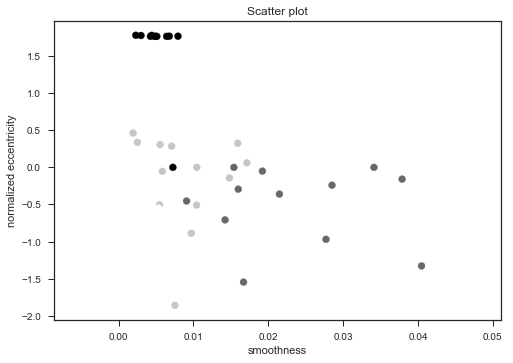

In [171]:
# your code goes here
x = leaf_data[['smoothness']]
y = normalized_df[['eccentricity']]

# Plot
plt.scatter(x, y,c=leaf_data[['class']])
plt.title('Scatter plot')
plt.xlabel('smoothness')
plt.ylabel('normalized eccentricity')
plt.show()
#One of the class is dense around a specific area.

Q10. Calculate the correlation between the normalized `eccentricity` and the `smoothness` column. 

In [229]:
# your code goes here
leaf_data['smoothness'].corr(norm_df['eccentricity'])

-0.35441841448389355

Q11. Create a plot to determine if there are any outliers in the `average-contrast` attribute.

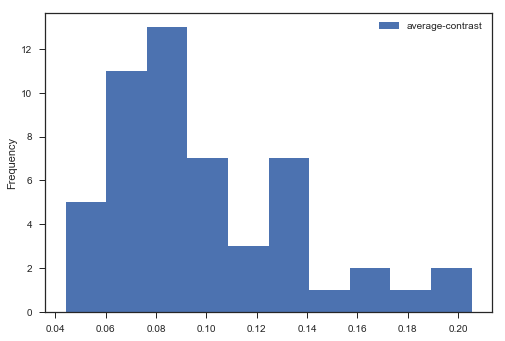

In [234]:
# your code goes here
new11 = leaf_data.dropna(subset=['average-contrast'])
new11[['average-contrast']].plot(kind='hist')